In [21]:
import pandas as pd

In [22]:
from matplotlib import pyplot as plt

In [23]:
df = pd.read_csv('nfldata.csv')

In [24]:
#cleaning data for evaluation

nfl_data = df.drop(columns = ['Rnk','Lg','Result','Pass_Comp','Comp_Perc','Pass_Rt','Sacks_Given','Sack_Yds','Yds_Gained_Att','Adj_Yds_Gained_Att','Rush_Yds_Att','Rec_Yds_Rec','Rec_Catch_Perc','Rec_Yds_Tgt','K_Ret_Att','K_Yds','K_Yds_Ret_Att','P_Ret','P_Ret_Yds','P_Ret_Yds_Ret','Fmb_Forc','Fmb','Fmb_Rec','Fmb_Yds'])
nfl_data['Player'] = nfl_data['Player'].str.rstrip('*')
nfl_data['Player'] = nfl_data['Player'].str.rstrip(' ')
nfl_data['Player'] = nfl_data['Player'].str.lower()
nfl_data = nfl_data.dropna(subset=['Player'])
nfl_data ['Away'] = nfl_data['Away'].fillna('False')
nfl_data ['Away'] = nfl_data['Away'].replace(['@'],'True')
nfl_data ['Pos'] = nfl_data['Pos'].replace(['LG','T','RT','RG','G','OL','LT','S','DT','C','CB','LS','NT','MIKE','G/T','DE','OT','C/G','DB','LB','G-C','LDT','G/OT','T/G','G/C','OS','DL','LOT','T/C','0'],'Delete')
nfl_data ['Pos'] = nfl_data['Pos'].replace(['FB','TB','HB','FB-T','FB/RB','FB/R','H-B','FB/T','HB/F','FB/DL','RB/F','RB/K','OW','Rb'],'RB')
nfl_data ['Pos'] = nfl_data['Pos'].replace(['WR ','WR/P','WR/PR','KR','WR/R','WR-K','WR/RS','WR-R','PR/W','WR W','WR/K','WC','K','P'],'WR')
nfl_data ['Pos'] = nfl_data['Pos'].replace(['FB/TE','F','TE/F','TE-F','TE/D','TE/L','TE/W'],'TE')
nfl_data ['Pos'] = nfl_data['Pos'].replace(['QB/W','QB-W'],'QB')
nfl_data = nfl_data.drop(nfl_data[nfl_data['Pos']=='Delete'].index)
nfl_data = nfl_data.fillna(0)
#list(nfl_data.columns)

In [25]:
#accept league scoring settings from user

lg_pass_yds = int(input('1 point equals how many pass yards? '))
lg_pass_tds = int(input('1 pass TD equals how many points? '))
lg_int = int(input('1 INT equals how many points?'))
lg_rush_yds = int(input('1 point equals how many rushing yards? '))
lg_rush_tds = int(input('1 rushing TD equals how many points? '))
lg_rec_rec = int(input('1 point is equal to how many receptions? '))
lg_rec_yds = int(input('1 point equals how many receiving yards? '))
lg_rec_tds = int(input('1 receiving TD equals how many points? '))
lg_spec_tds = int(input('1 special teams TD equals how many points? '))
lg_fmb = int(input('1 fumble equals how many points? '))

1 point equals how many pass yards? 25
1 pass TD equals how many points? 4
1 INT equals how many points?-1
1 point equals how many rushing yards? 10
1 rushing TD equals how many points? 6
1 point is equal to how many receptions? 2
1 point equals how many receiving yards? 10
1 receiving TD equals how many points? 6
1 special teams TD equals how many points? 6
1 fumble equals how many points? -2


In [26]:
#add fantasy score totals based off league info

nfl_data['Pass_Yds_Pts'] = nfl_data['Pass_Yds'].apply(lambda x: x/lg_pass_yds)
nfl_data['Pass_TD_Pts'] = nfl_data['Pass_TD'].apply(lambda x: x*lg_pass_tds)
nfl_data['Pass_INT_Pts'] = nfl_data['Pass_INT'].apply(lambda x: x*lg_int)
nfl_data['Rush_Yds_Pts'] = nfl_data['Rush_Yds'].apply(lambda x: x/lg_rush_yds)
nfl_data['Rush_TD_Pts'] = nfl_data['Rush_TD'].apply(lambda x: x*lg_rush_tds)
nfl_data['Rec_Rec_Pts'] = nfl_data['Rec_Rec'].apply(lambda x: x/lg_rec_rec)
nfl_data['Rec_Yds_Pts'] = nfl_data['Rec_Yds'].apply(lambda x: x/lg_rec_yds)
nfl_data['Rec_TD_Pts'] = nfl_data['Rec_TD'].apply(lambda x: x*lg_rec_tds)
nfl_data['K_Ret_TD_Pts'] = nfl_data['K_Ret_TD'].apply(lambda x: x*lg_spec_tds)
nfl_data['P_Ret_TD_Pts'] = nfl_data['P_Ret_TD'].apply(lambda x: x*lg_spec_tds)
nfl_data['Fmb_L_Pts'] = nfl_data['Fmb_L'].apply(lambda x: x*lg_fmb)
nfl_data['Fmb_TD_Pts'] = nfl_data['Fmb_TD'].apply(lambda x: x*lg_spec_tds)

nfl_data['Fantasy_Pts_Total'] = nfl_data['Pass_Yds_Pts']+nfl_data['Pass_TD_Pts']+nfl_data['Pass_INT_Pts']+nfl_data['Rush_Yds_Pts']+nfl_data['Rush_TD_Pts']+nfl_data['Rec_Rec_Pts']+nfl_data['Rec_Yds_Pts']+nfl_data['Rec_TD_Pts']+nfl_data['K_Ret_TD_Pts']+nfl_data['P_Ret_TD_Pts']+nfl_data['Fmb_L_Pts']+nfl_data['Fmb_TD_Pts']

In [27]:
#making some values integeres as they cannot be floats
nfl_data = nfl_data.astype({'Game_Num':'int64','Week':'int64','Pass_Att':'int64','Pass_TD':'int64','Pass_Yds':'int64','Pass_INT':'int64','Rush_Att':'int64','Rush_Yds':'int64','Rush_TD':'int64','Rec_Tgt':'int64','Rec_Rec':'int64','Rec_Yds':'int64','Rec_TD':'int64','K_Ret_TD':'int64','P_Ret_TD':'int64','Fmb_L':'int64','Fmb_TD':'int64'})

In [28]:
#Choose how to filter the NFL data
filter_pass_att = int(input('Filter by how many pass attempts minimum? '))
filter_rush_att = int(input('Filter by how many rush attempts minimum? '))
filter_rec_tgt = int(input('Filter by how many receiving targets minimum? '))

Filter by how many pass attempts minimum? 6
Filter by how many rush attempts minimum? 4
Filter by how many receiving targets minimum? 2


In [29]:
#Filter out pass attempts or rush attempts or receiving targets lower than X
nfl_data = nfl_data.query(f'Pass_Att >= {filter_pass_att} or Rush_Att >= {filter_rush_att} or Rec_Tgt>= {filter_rec_tgt}')

In [30]:
#define x axis
nfl_week = nfl_data.Week.unique()
nfl_day = nfl_data.Day.unique()
nfl_pos = nfl_data.Pos.unique()
nfl_opp = nfl_data.Opp.unique()
nfl_week.sort()
nfl_day.sort()
nfl_pos.sort()
nfl_opp.sort()

In [31]:
#define y axis

In [32]:
#grouping data for plotting
nfl_week_avg = nfl_data.groupby('Week')['Fantasy_Pts_Total'].mean()
nfl_pos_avg = nfl_data.groupby('Pos')['Fantasy_Pts_Total'].mean()
nfl_player_avg = nfl_data.groupby('Player')['Fantasy_Pts_Total'].mean()
nfl_day_avg = nfl_data.groupby('Day')['Fantasy_Pts_Total'].mean()

In [33]:
#grouping data for plotting
nfl_week_std = nfl_data.groupby('Week')['Fantasy_Pts_Total'].std()
nfl_pos_std = nfl_data.groupby('Pos')['Fantasy_Pts_Total'].std()
nfl_player_std = nfl_data.groupby('Player')['Fantasy_Pts_Total'].std()
nfl_day_std = nfl_data.groupby('Day')['Fantasy_Pts_Total'].std()

In [34]:
#grouping data for plotting
nfl_pos_week_avg = nfl_data.groupby(['Pos','Week'])['Fantasy_Pts_Total'].mean()
nfl_player_week_avg = nfl_data.groupby(['Player','Week'])['Fantasy_Pts_Total'].mean()
nfl_player_day_avg = nfl_data.groupby(['Player','Day'])['Fantasy_Pts_Total'].mean()
nfl_player_opp_avg = nfl_data.groupby(['Player','Opp'])['Fantasy_Pts_Total'].mean()
nfl_pos_week_std = nfl_data.groupby(['Pos','Week'])['Fantasy_Pts_Total'].std()
nfl_player_week_std = nfl_data.groupby(['Player','Week'])['Fantasy_Pts_Total'].std()
nfl_player_day_std = nfl_data.groupby(['Player','Day'])['Fantasy_Pts_Total'].std()
nfl_player_opp_std = nfl_data.groupby(['Player','Opp'])['Fantasy_Pts_Total'].std()

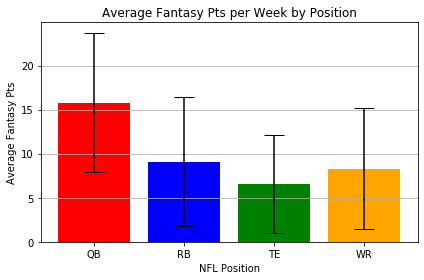

In [35]:
fig1, ax1 = plt.subplots()
ax1.bar(nfl_pos,nfl_pos_avg,yerr=nfl_pos_std,align='center',color =['red','blue','green','orange'],ecolor='black',capsize=10)
ax1.set_ylabel('Average Fantasy Pts')
ax1.set_xticks(nfl_pos)
ax1.set_xticklabels(nfl_pos)
ax1.set_xlabel('NFL Position')
ax1.set_title('Average Fantasy Pts per Week by Position')
ax1.yaxis.grid(True)

plt.tight_layout()
plt.show()

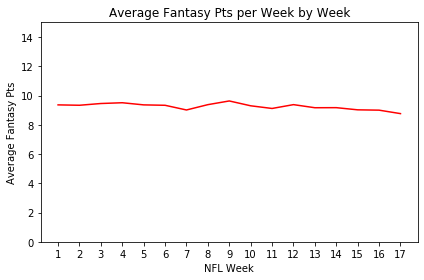

In [36]:
plt.plot(nfl_week_avg,'r')
plt.ylabel('Average Fantasy Pts')
plt.xlabel('NFL Week')
plt.xticks(nfl_week)
plt.ylim(0,15)
plt.title('Average Fantasy Pts per Week by Week')

plt.tight_layout()
plt.show()

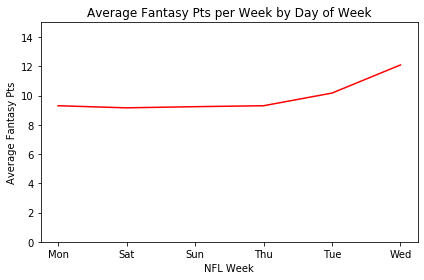

In [40]:
plt.plot(nfl_day_avg,'r')
plt.ylabel('Average Fantasy Pts')
plt.xlabel('NFL Week')
plt.xticks(nfl_day)
plt.ylim(0,15)
plt.title('Average Fantasy Pts per Week by Day of Week')

plt.tight_layout()
plt.show()

In [43]:
player1 = str(input("Enter a NFL Player from 2010 to 2019: "))
low = int(input("Start week: "))-1
high = int(input("End week: "))

Enter a NFL Player from 2010 to 2019: Tom Brady
Start week: 1
End week: 17


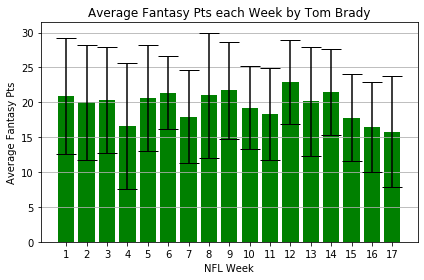

In [44]:
x = nfl_week[low:high]
y = nfl_player_week_avg[player1.lower()][low:high]
std = nfl_player_week_std[player1.lower()][low:high]

fig2, ax2 = plt.subplots()
ax2.bar(x,y,yerr=std,align='center',color='g',ecolor='black',capsize=10)
ax2.set_ylabel('Average Fantasy Pts')
ax2.set_xticks(x)
ax2.set_xticklabels(x)
ax2.set_xlabel('NFL Week')
ax2.set_title(f'Average Fantasy Pts each Week by {player1}')
ax2.yaxis.grid(True)

plt.tight_layout()
plt.show()

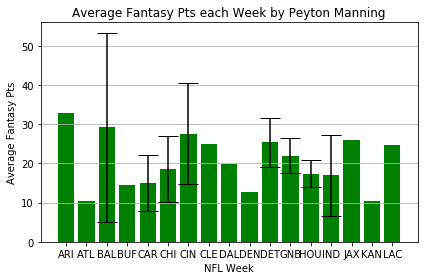

In [42]:
x = nfl_opp[low:high]
y = nfl_player_opp_avg[player1.lower()][low:high]
std = nfl_player_opp_std[player1.lower()][low:high]

fig2, ax2 = plt.subplots()
ax2.bar(x,y,yerr=std,align='center',color='g',ecolor='black',capsize=10)
ax2.set_ylabel('Average Fantasy Pts')
ax2.set_xticks(x)
ax2.set_xticklabels(x)
ax2.set_xlabel('NFL Week')
ax2.set_title(f'Average Fantasy Pts each Week by {player1}')
ax2.yaxis.grid(True)

plt.tight_layout()
plt.show()